In [54]:
# Importacion de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

%matplotlib inline

plt.style.use('default') # para graficos matplotlib
plt.rcParams['figure.figsize'] = (10, 8)

sns.set(style="whitegrid") # grid seaborn

pd.options.display.float_format = '{:20,.0f}'.format # notacion output

# Acceso a set de datos

In [2]:
path = "/home/seba/Escritorio/Datos/TP1/data/"
df_props_full = pd.read_csv(path + "train_dollar.csv")

In [3]:
df_props_full.columns

Index(['fecha', 'id', 'titulo', 'descripcion', 'tipodepropiedad', 'direccion',
       'ciudad', 'provincia', 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales', 'idzona', 'lat', 'lng', 'gimnasio',
       'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos', 'Precio_MEX', 'MEX_to_USD', 'Precio_USD'],
      dtype='object')

# Conversión de tipos

In [4]:
df_props_full['fecha'] = pd.to_datetime(df_props_full['fecha'])

In [5]:
# Convierto todos los valores 1/0 a uint8
df_props_full['gimnasio'] = df_props_full['gimnasio'].astype('uint8')
df_props_full['usosmultiples'] = df_props_full['usosmultiples'].astype('uint8')
df_props_full['piscina'] = df_props_full['piscina'].astype('uint8')
df_props_full['escuelascercanas'] = df_props_full['escuelascercanas'].astype('uint8')
df_props_full['centroscomercialescercanos'] = df_props_full['centroscomercialescercanos'].astype('uint8')

In [6]:
# Convierto los representables en uint8. Utilizo el tipo de pandas UInt8Dtype para evitar conflicto con NaN
df_props_full['antiguedad'] = df_props_full['antiguedad'].astype(pd.UInt8Dtype())
df_props_full['habitaciones'] = df_props_full['habitaciones'].astype(pd.UInt8Dtype())
df_props_full['garages'] = df_props_full['garages'].astype(pd.UInt8Dtype())
df_props_full['banos'] = df_props_full['banos'].astype(pd.UInt8Dtype())

In [7]:
# Convierto los representables en uint16. Utilizo el tipo de pandas UInt16Dtype para evitar conflicto con NaN
df_props_full['metroscubiertos'] = df_props_full['metroscubiertos'].astype(pd.UInt16Dtype())
df_props_full['metrostotales'] = df_props_full['metrostotales'].astype(pd.UInt16Dtype())

In [8]:
# Convierto los representables en uint32. Utilizo el tipo de pandas UInt32Dtype para evitar conflicto con NaN
df_props_full['id'] = df_props_full['id'].astype(pd.UInt32Dtype())
df_props_full['idzona'] = df_props_full['idzona'].astype(pd.UInt32Dtype())
df_props_full['Precio_MEX'] = df_props_full['Precio_MEX'].astype(pd.UInt32Dtype())
df_props_full['Precio_USD'] = df_props_full['Precio_USD'].astype(pd.UInt32Dtype())

# Analisis Habitaciones

In [9]:
precioHabitaciones = df_props_full.loc[:,['habitaciones','Precio_USD']]
print(len(precioHabitaciones))
precioHabitaciones.habitaciones.value_counts().sum()

240000


217529

In [10]:
# Propiedades con cant. habitaciones nan
df_props_full[df_props_full.habitaciones.isna()].tipodepropiedad.value_counts()

Terreno                          9467
Casa                             3338
Local Comercial                  2680
Oficina comercial                1417
Terreno comercial                1254
Bodega comercial                 1249
Edificio                         1093
Apartamento                       994
Casa en condominio                215
Casa uso de suelo                 206
Local en centro comercial         143
Inmuebles productivos urbanos     117
Otros                              65
Nave industrial                    63
Villa                              37
Quinta Vacacional                  33
Terreno industrial                 28
Rancho                             28
Huerta                             13
Lote                                5
Departamento Compartido             4
Duplex                              3
Garage                              1
Name: tipodepropiedad, dtype: int64

In [11]:
df_props_full[df_props_full.tipodepropiedad=='Terreno'].habitaciones.value_counts()

3     138
2     127
1     111
4      58
5      23
6       8
10      5
7       4
8       3
9       1
Name: habitaciones, dtype: int64

In [12]:
df_props_full[df_props_full.tipodepropiedad=='Local Comercial'].habitaciones.value_counts()

1     103
2      86
3      69
4      50
5      22
10     14
6      12
8       7
9       7
7       5
Name: habitaciones, dtype: int64

In [13]:
df_props_full[df_props_full.tipodepropiedad=='Oficina comercial'].habitaciones.value_counts()

3     66
1     56
4     53
2     39
5     35
6     29
10    14
7     13
8     13
9      6
Name: habitaciones, dtype: int64

In [14]:
df_props_full[df_props_full.tipodepropiedad=='Terreno comercial'].habitaciones.value_counts()

3     22
1     17
2     13
4     11
5      6
6      2
10     1
Name: habitaciones, dtype: int64

In [15]:
# Elimino habitaciones con valores nulos (representan menos del 10% de los datos y valores observados no tienen un tendencia clara)
precioHabitaciones = precioHabitaciones.dropna()
len(precioHabitaciones)

217529

In [16]:
precioHabitaciones.head()

,habitaciones,Precio_USD
0,2,68400
1,3,69840
2,3,467999
3,3,258479
4,3,80640


In [17]:
cantHabs = precioHabitaciones.habitaciones.value_counts().to_frame().sort_index().reset_index()
cantHabs.columns = ['habitaciones','pubs']
cantHabs

,habitaciones,pubs
0,1,5069
1,2,57808
2,3,121887
3,4,25068
4,5,4596
5,6,1669
6,7,539
7,8,398
8,9,179
9,10,316


Text(0.5, 0, 'Habitaciones')

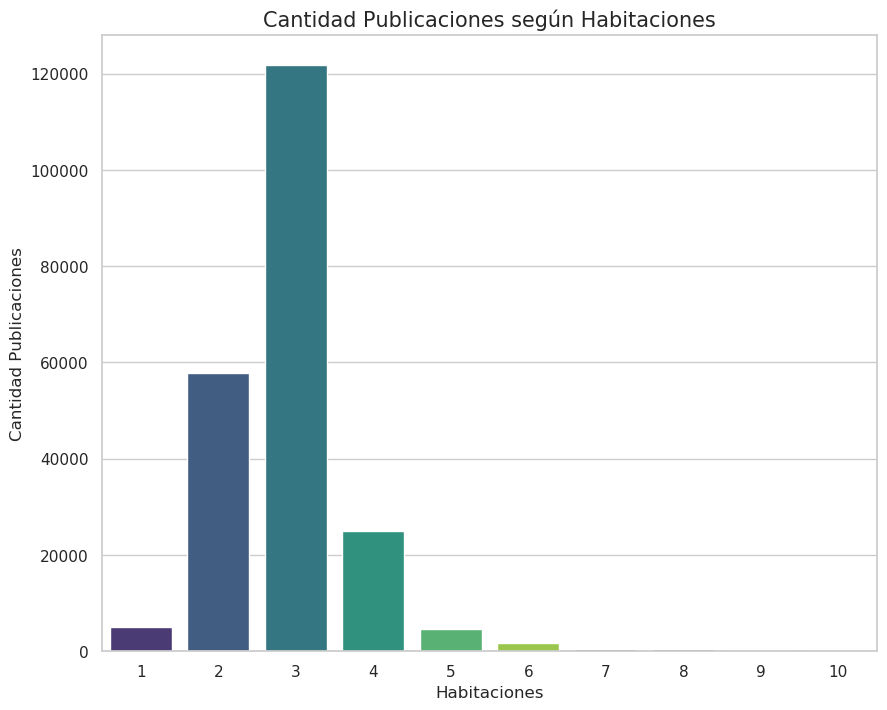

In [55]:
sns.barplot(data=cantHabs, x='habitaciones',y='pubs', orient='v', palette = (sns.color_palette("viridis",)))
plt.title('Cantidad Publicaciones según Habitaciones', fontsize = 15)
plt.ylabel('Cantidad Publicaciones', fontsize = 12)
plt.xlabel('Habitaciones', fontsize = 12)

Text(0.5, 0, 'Habitaciones')

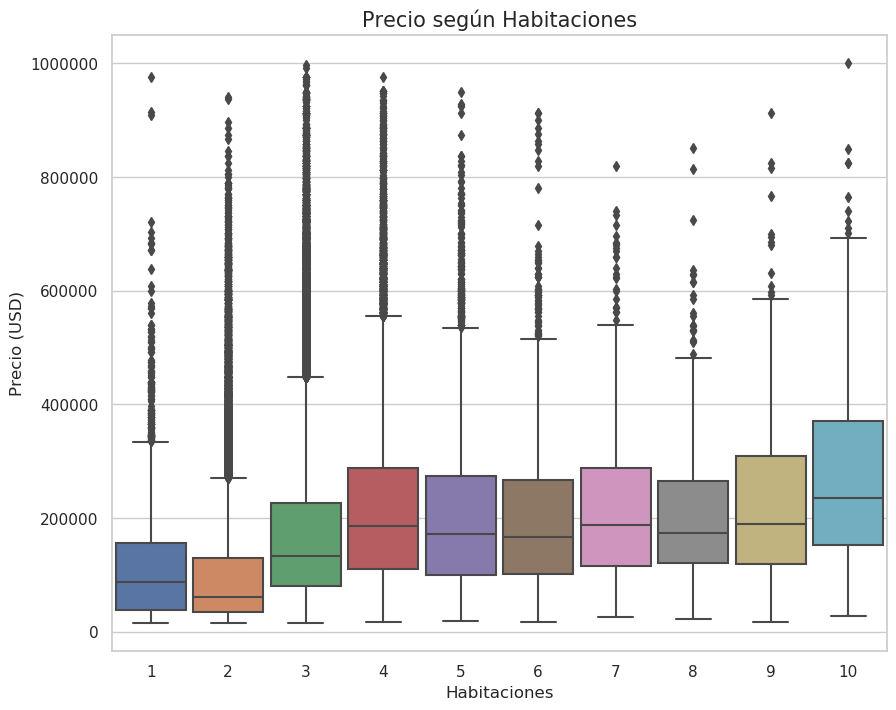

In [56]:
sns.boxplot(x=precioHabitaciones.habitaciones, y=precioHabitaciones.Precio_USD, data=precioHabitaciones, width=0.9, order=[1,2,3,4,5,6,7,8,9,10])
plt.title('Precio según Habitaciones', fontsize = 15)
plt.ylabel('Precio (USD)', fontsize = 12)
plt.xlabel('Habitaciones', fontsize = 12)

# Analisis Baños

In [20]:
precioBaños = df_props_full.loc[:,['banos','Precio_USD']]
print(len(precioBaños))
precioBaños.banos.value_counts().sum()

240000


213779

In [21]:
# Propiedades con cant. baños nan
df_props_full[df_props_full.banos.isna()].tipodepropiedad.value_counts()

Terreno                          9422
Casa                             8609
Local Comercial                  1737
Apartamento                      1337
Terreno comercial                1152
Edificio                         1029
Casa en condominio                803
Oficina comercial                 760
Bodega comercial                  660
Casa uso de suelo                 157
Inmuebles productivos urbanos     128
Local en centro comercial         122
Otros                              63
Quinta Vacacional                  54
Villa                              40
Rancho                             33
Nave industrial                    32
Terreno industrial                 22
Huerta                             12
Departamento Compartido             7
Lote                                5
Duplex                              5
Garage                              1
Hospedaje                           1
Name: tipodepropiedad, dtype: int64

In [22]:
df_props_full[df_props_full.tipodepropiedad=='Terreno'].banos.value_counts()

1    270
2    169
3     59
4     25
Name: banos, dtype: int64

In [23]:
df_props_full[df_props_full.tipodepropiedad=='Local Comercial'].banos.value_counts()

1    624
2    438
3    140
4    116
Name: banos, dtype: int64

In [24]:
df_props_full[df_props_full.tipodepropiedad=='Oficina comercial'].banos.value_counts()

1    385
2    331
3    169
4     96
Name: banos, dtype: int64

In [25]:
df_props_full[df_props_full.tipodepropiedad=='Terreno comercial'].banos.value_counts()

1    80
2    58
3    25
4    11
Name: banos, dtype: int64

In [26]:
# Elimino habitaciones con valores nulos (representan aprox. el 10% de los datos y valores observados no tienen un tendencia clara)
precioBaños = precioBaños.dropna()
len(precioBaños)

213779

In [27]:
precioBaños.head()

,banos,Precio_USD
0,2,68400
1,2,69840
2,3,467999
3,3,258479
4,2,80640


In [28]:
cantBaños = precioBaños.banos.value_counts().to_frame().sort_index().reset_index()
cantBaños.columns = ['banos','pubs']
cantBaños

,banos,pubs
0,1,58173
1,2,87683
2,3,49365
3,4,18558


Text(0.5, 0, 'Baños')

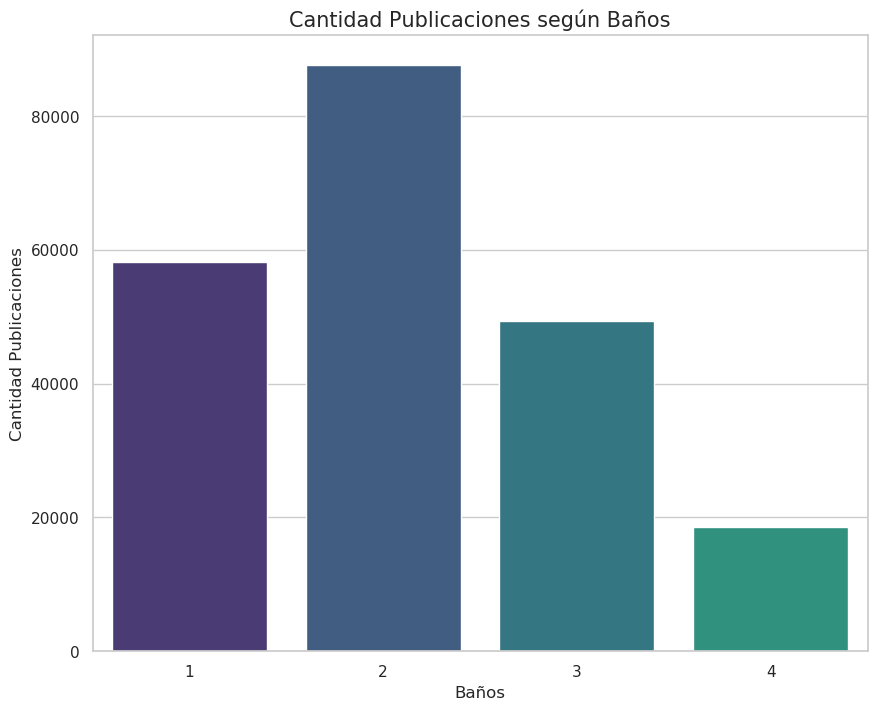

In [57]:
sns.barplot(data=cantBaños, x='banos',y='pubs', orient='v', palette = (sns.color_palette("viridis",)))
plt.title('Cantidad Publicaciones según Baños', fontsize = 15)
plt.ylabel('Cantidad Publicaciones', fontsize = 12)
plt.xlabel('Baños', fontsize = 12)

Text(0.5, 0, 'Baños')

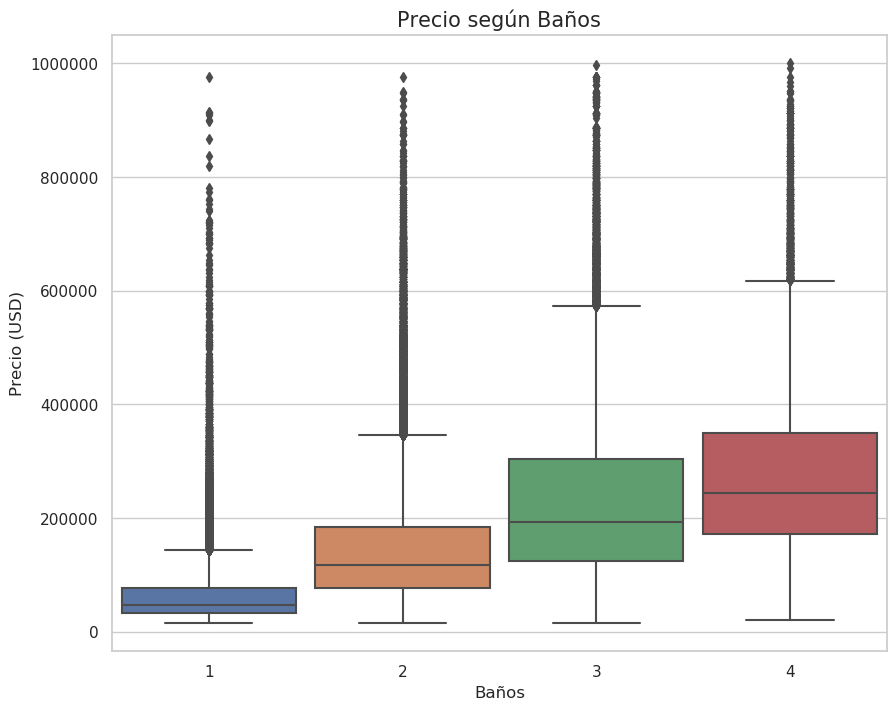

In [58]:
sns.boxplot(x=precioBaños.banos, y=precioBaños.Precio_USD, data=precioBaños, width=0.9, order=[1,2,3,4])
plt.title('Precio según Baños', fontsize = 15)
plt.ylabel('Precio (USD)', fontsize = 12)
plt.xlabel('Baños', fontsize = 12)

# Analisis Garages

In [31]:
precioGarages = df_props_full.loc[:,['garages','tipodepropiedad','Precio_USD']]
print(len(precioGarages))
precioGarages.garages.value_counts().sum()

240000


202235

In [32]:
# Propiedades con cant. garages nan
df_props_full[df_props_full.garages.isna()].tipodepropiedad.value_counts()

Casa                             23961
Apartamento                       3736
Casa en condominio                3237
Terreno                           2403
Local Comercial                   1221
Terreno comercial                  613
Oficina comercial                  539
Bodega comercial                   525
Edificio                           523
Casa uso de suelo                  240
Quinta Vacacional                  239
Villa                              159
Rancho                              95
Otros                               82
Inmuebles productivos urbanos       50
Local en centro comercial           45
Terreno industrial                  26
Nave industrial                     20
Duplex                               7
Huerta                               5
Departamento Compartido              4
Lote                                 4
Name: tipodepropiedad, dtype: int64

In [33]:
df_props_full[df_props_full.tipodepropiedad=='Duplex'].garages.value_counts()

1    228
2     68
0     29
3     11
Name: garages, dtype: int64

In [34]:
df_props_full[df_props_full.tipodepropiedad=='Nave industrial'].garages.value_counts()

0    35
2     9
3     9
1     3
Name: garages, dtype: int64

In [35]:
df_props_full[df_props_full.tipodepropiedad=='Terreno industrial'].garages.value_counts()

0    3
2    1
3    1
Name: garages, dtype: int64

In [36]:
df_props_full[df_props_full.tipodepropiedad=='Local en centro comercial'].garages.value_counts()

0    93
1    13
2     9
3     5
Name: garages, dtype: int64

In [37]:
df_props_full[df_props_full.tipodepropiedad=='Inmuebles productivos urbanos'].garages.value_counts()

0    111
2     19
1     13
3      7
Name: garages, dtype: int64

In [38]:
df_props_full[df_props_full.tipodepropiedad=='Rancho'].garages.value_counts()

0    53
1     8
2     7
3     7
Name: garages, dtype: int64

In [39]:
df_props_full[df_props_full.tipodepropiedad=='Villa'].garages.value_counts()

2    96
1    53
3    18
0    14
Name: garages, dtype: int64

In [40]:
df_props_full[df_props_full.tipodepropiedad=='Quinta Vacacional'].garages.value_counts()

0    88
2    31
3    27
1    10
Name: garages, dtype: int64

In [41]:
df_props_full[df_props_full.tipodepropiedad=='Casa uso de suelo'].garages.value_counts()

2    136
0    128
1    108
3     96
Name: garages, dtype: int64

In [42]:
df_props_full[df_props_full.tipodepropiedad=='Terreno'].garages.value_counts()

0    7364
2      80
1      55
3      43
Name: garages, dtype: int64

In [43]:
df_props_full[df_props_full.tipodepropiedad=='Local Comercial'].garages.value_counts()

0    1283
2     245
1     204
3     102
Name: garages, dtype: int64

In [44]:
df_props_full[df_props_full.tipodepropiedad=='Oficina comercial'].garages.value_counts()

0    500
1    328
2    258
3    116
Name: garages, dtype: int64

In [45]:
df_props_full[df_props_full.tipodepropiedad=='Terreno comercial'].garages.value_counts()

0    676
2     17
3     12
1      8
Name: garages, dtype: int64

In [46]:
df_props_full[df_props_full.tipodepropiedad=='Bodega comercial'].garages.value_counts()

0    659
2     81
1     79
3     62
Name: garages, dtype: int64

In [47]:
df_props_full[df_props_full.tipodepropiedad=='Edificio'].garages.value_counts()

0    568
2    112
3    108
1     85
Name: garages, dtype: int64

In [48]:
# Completo con 0 aquellos tipos de propiedades que muestran una clara mayoria de este valor en sus publicaciones, elimino el resto
aCompletar = ['Edificio','Bodega comercial','Terreno comercial','Local comercial','Terreno','Rancho','Inmuebles productivos urbanos','Nave industrial','Local en centro comercial']
precioGarages[precioGarages.tipodepropiedad.isin(aCompletar)] = precioGarages[precioGarages.tipodepropiedad.isin(aCompletar)].fillna(0)
precioGarages = precioGarages.dropna()
len(precioGarages)

206494

In [49]:
precioGarages.head()

,garages,tipodepropiedad,Precio_USD
0,1,Apartamento,68400
1,2,Casa,69840
2,3,Casa,467999
3,3,Casa en condominio,258479
4,2,Casa,80640


In [50]:
precioGarages = precioGarages.loc[:,['garages','Precio_USD']]

In [51]:
cantGarages = precioGarages.garages.value_counts().to_frame().sort_index().reset_index()
cantGarages.columns = ['garages','pubs']
cantGarages

,garages,pubs
0,0,31198
1,1,59460
2,2,94160
3,3,21676


Text(0.5, 0, 'Garages')

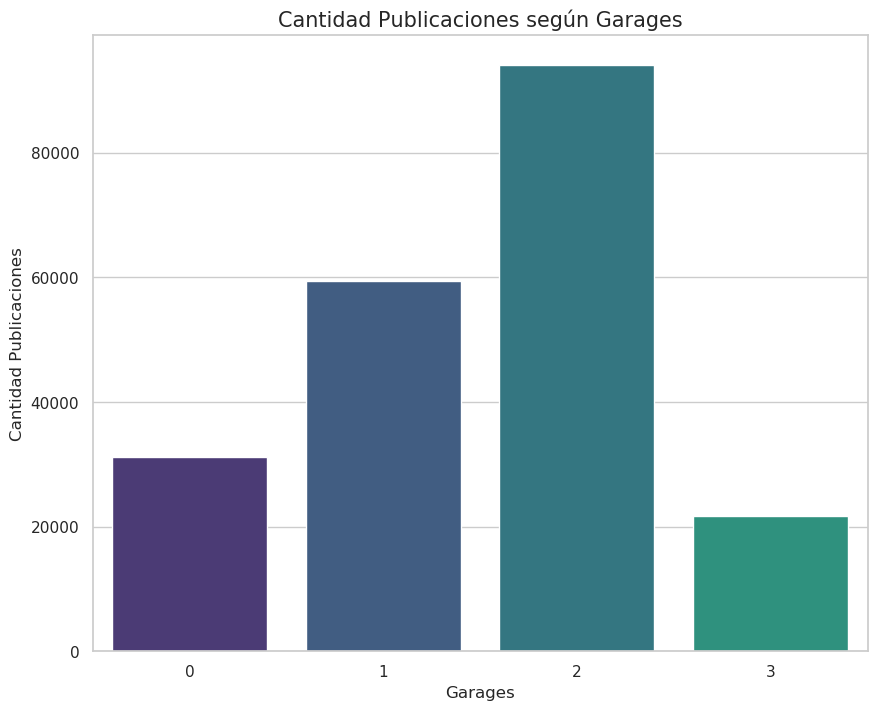

In [59]:
sns.barplot(data=cantGarages, x='garages',y='pubs', orient='v', palette = (sns.color_palette("viridis",)))
plt.title('Cantidad Publicaciones según Garages', fontsize = 15)
plt.ylabel('Cantidad Publicaciones', fontsize = 12)
plt.xlabel('Garages', fontsize = 12)

Text(0.5, 0, 'Garages')

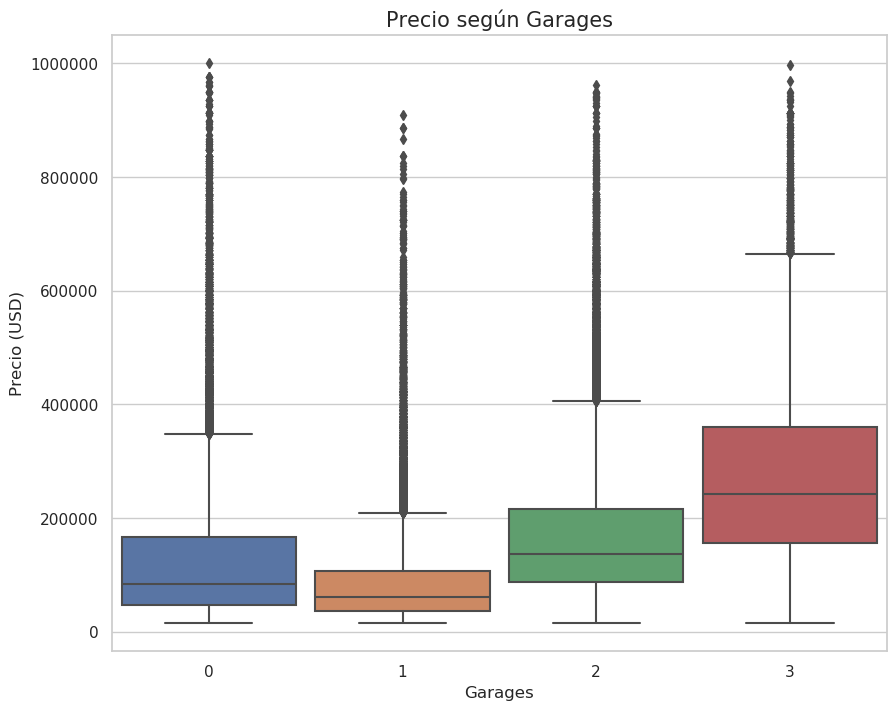

In [60]:
sns.boxplot(x=precioGarages.garages, y=precioGarages.Precio_USD, data=precioGarages, width=0.9, order=[0,1,2,3])
plt.title('Precio según Garages', fontsize = 15)
plt.ylabel('Precio (USD)', fontsize = 12)
plt.xlabel('Garages', fontsize = 12)

# Relacion entre las variables de una propiedad

In [187]:
relacion = df_props_full.loc[:,['banos','habitaciones','garages','tipodepropiedad']]

In [188]:
# Completo valores de garage como en el analisis individualrelacion
relacion[relacion.tipodepropiedad.isin(aCompletar)] = relacion[relacion.tipodepropiedad.isin(aCompletar)].fillna(0)

In [189]:
relacion.describe()

,banos,habitaciones,garages
count,"226,357","230,943","206,509"
mean,2,3,2
std,1,1,1
min,0,0,0
25%,1,2,1
50%,2,3,2
75%,3,3,2
max,4,10,3


In [190]:
# Me quedo solo con aquellos valores que presentan valores para baños. habitaciones y garages
relacion = relacion.dropna()

In [191]:
relacion.describe()

,banos,habitaciones,garages
count,"194,773","194,773","194,773"
mean,2,3,2
std,1,1,1
min,0,0,0
25%,1,2,1
50%,2,3,2
75%,3,3,2
max,4,10,3


In [192]:
relacion.head()

,banos,habitaciones,garages,tipodepropiedad
0,2,2,1,Apartamento
1,2,3,2,Casa
2,3,3,3,Casa
3,3,3,3,Casa en condominio
4,2,3,2,Casa


In [193]:
relacion['banos'] = relacion['banos'].astype('float64')
relacion['habitaciones'] = relacion['habitaciones'].astype('float64')
relacion['garages'] = relacion['garages'].astype('float64')

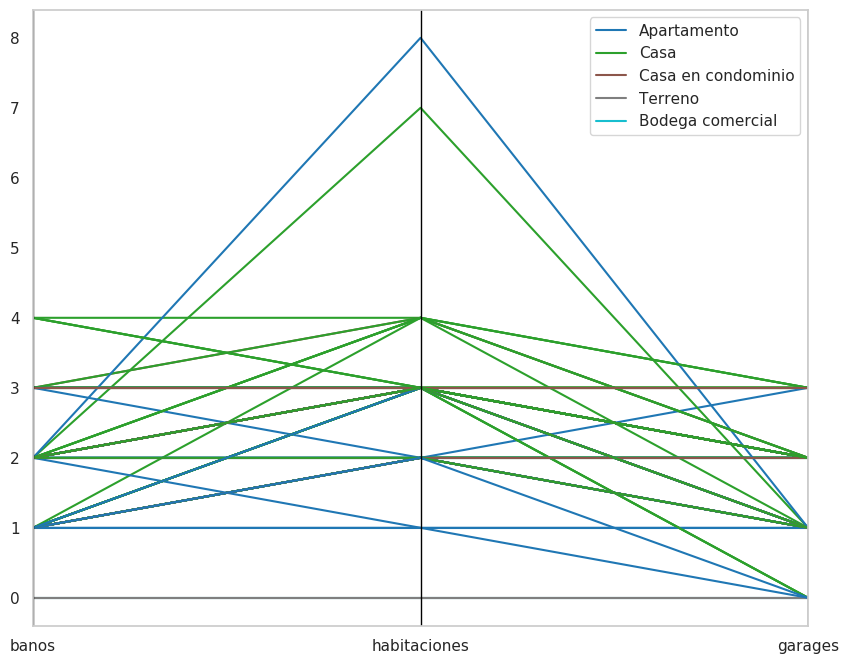

In [194]:
pd.plotting.parallel_coordinates(relacion.head(100), 'tipodepropiedad', colormap='tab10')

In [199]:
relacion[relacion.habitaciones==0].tipodepropiedad.value_counts()

Terreno                          9467
Terreno comercial                1254
Bodega comercial                 1249
Edificio                         1093
Local en centro comercial         143
Inmuebles productivos urbanos     117
Nave industrial                    63
Rancho                             28
Name: tipodepropiedad, dtype: int64

In [200]:
relacion[relacion.banos==0].tipodepropiedad.value_counts()

Terreno                          9422
Terreno comercial                1152
Edificio                         1029
Bodega comercial                  660
Inmuebles productivos urbanos     128
Local en centro comercial         122
Rancho                             33
Nave industrial                    32
Name: tipodepropiedad, dtype: int64